In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Load the dataset (assuming the dataset is in CSV format)
df = pd.read_csv('../Datasets/phishing_website_data.csv')

In [3]:

# 1. Basic information about the dataset
print("Basic Information of the Dataset")
print(df.info())

Basic Information of the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-

In [4]:
# 2. Descriptive statistics for numerical columns
print("\nDescriptive Statistics of Numerical Columns")
print(df.describe())



Descriptive Statistics of Numerical Columns
           URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628  

In [5]:

# 3. Check for missing values
print("\nMissing Values Count")
print(df.isnull().sum())


Missing Values Count
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore

No data is missing in the dataset - thus preprocessing of the data is not required.

C:\Users\Abhirup Das\AppData\Local\Temp\ipykernel_42548\4000385961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


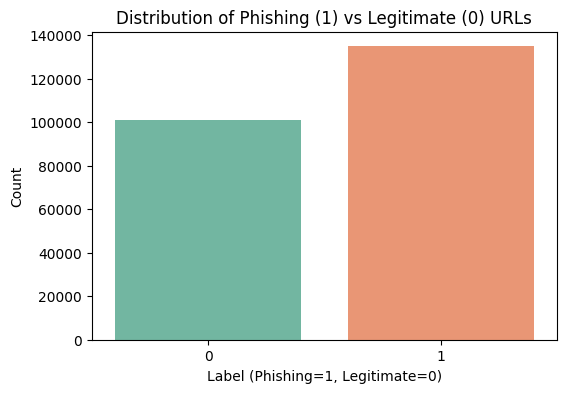

In [6]:
# 4. Distribution of the Target Variable (Phishing vs Legitimate)
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Phishing (1) vs Legitimate (0) URLs')
plt.xlabel('Label (Phishing=1, Legitimate=0)')
plt.ylabel('Count')
plt.show()

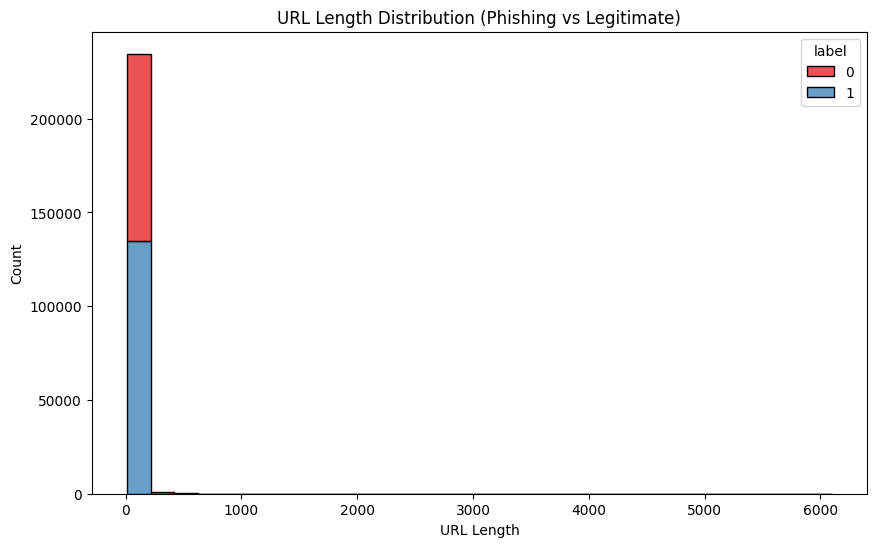

In [7]:
# 5. Distribution of URL Length for Phishing and Legitimate URLs
plt.figure(figsize=(10,6))
sns.histplot(df, x='URLLength', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('URL Length Distribution (Phishing vs Legitimate)')
plt.xlabel('URL Length')
plt.ylabel('Count')
plt.show()

C:\Users\Abhirup Das\AppData\Local\Temp\ipykernel_42548\1642969722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='URLLength', data=df, palette='Set2')


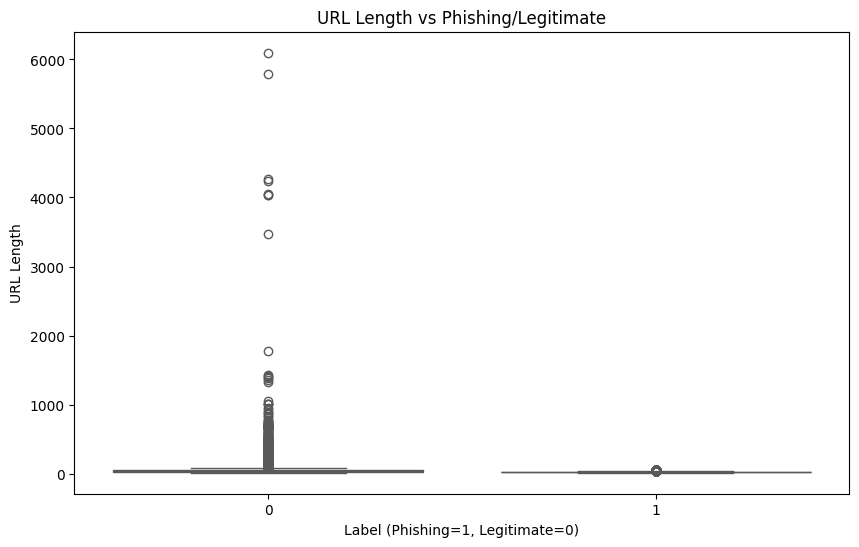

In [8]:
# 6. Boxplot of URL length vs Label
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='URLLength', data=df, palette='Set2')
plt.title('URL Length vs Phishing/Legitimate')
plt.xlabel('Label (Phishing=1, Legitimate=0)')
plt.ylabel('URL Length')
plt.show()

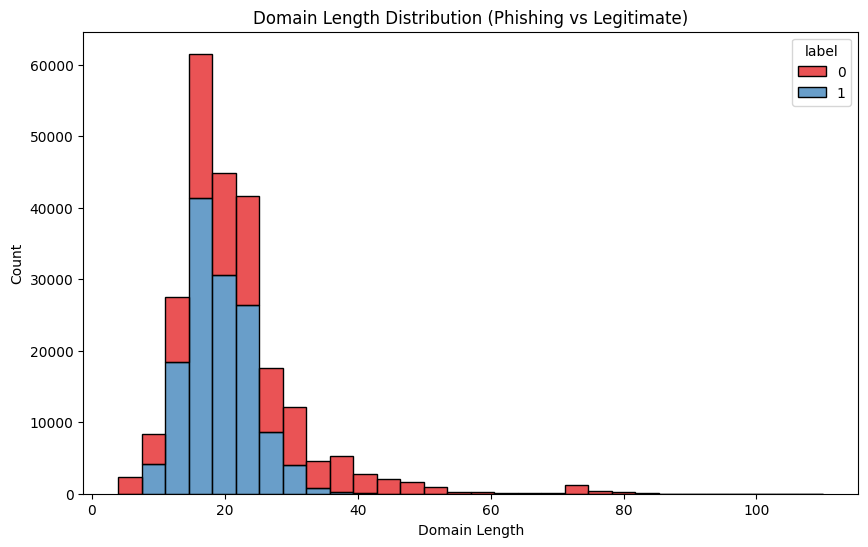

In [9]:

# 7. Domain Length Distribution based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='DomainLength', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Domain Length Distribution (Phishing vs Legitimate)')
plt.xlabel('Domain Length')
plt.ylabel('Count')
plt.show()

C:\Users\Abhirup Das\AppData\Local\Temp\ipykernel_42548\2856260161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='DomainLength', data=df, palette='Set2')


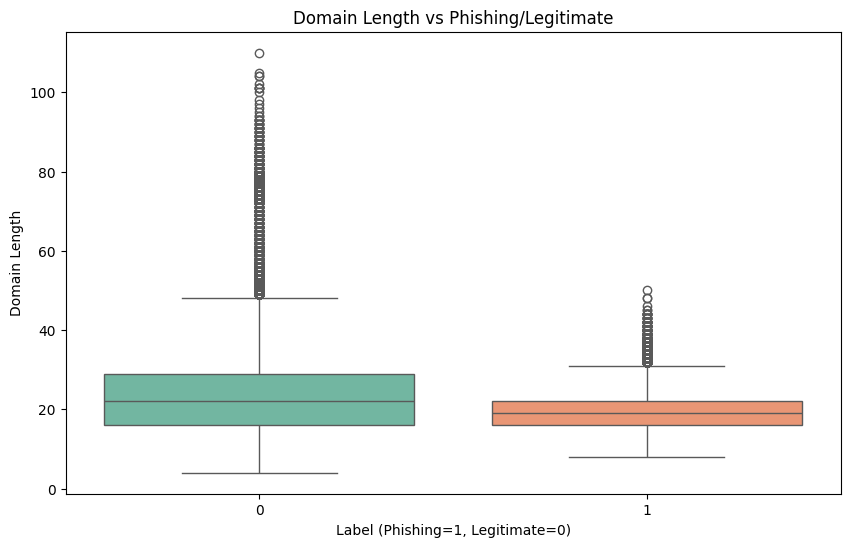

In [10]:
# 8. Boxplot of Domain length vs Label
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='DomainLength', data=df, palette='Set2')
plt.title('Domain Length vs Phishing/Legitimate')
plt.xlabel('Label (Phishing=1, Legitimate=0)')
plt.ylabel('Domain Length')
plt.show()

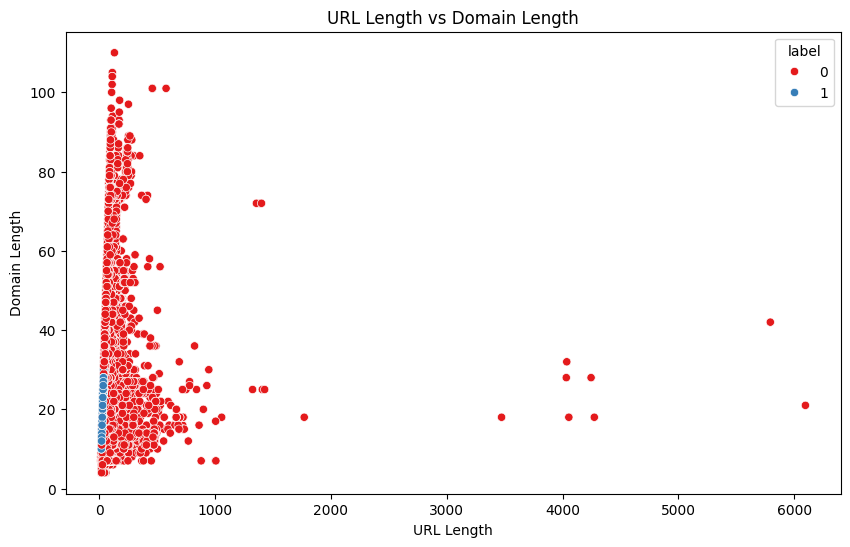

In [11]:
# 9. Scatterplot between URL Length and Domain Length
plt.figure(figsize=(10,6))
sns.scatterplot(x='URLLength', y='DomainLength', hue='label', palette='Set1', data=df)
plt.title('URL Length vs Domain Length')
plt.xlabel('URL Length')
plt.ylabel('Domain Length')
plt.show()

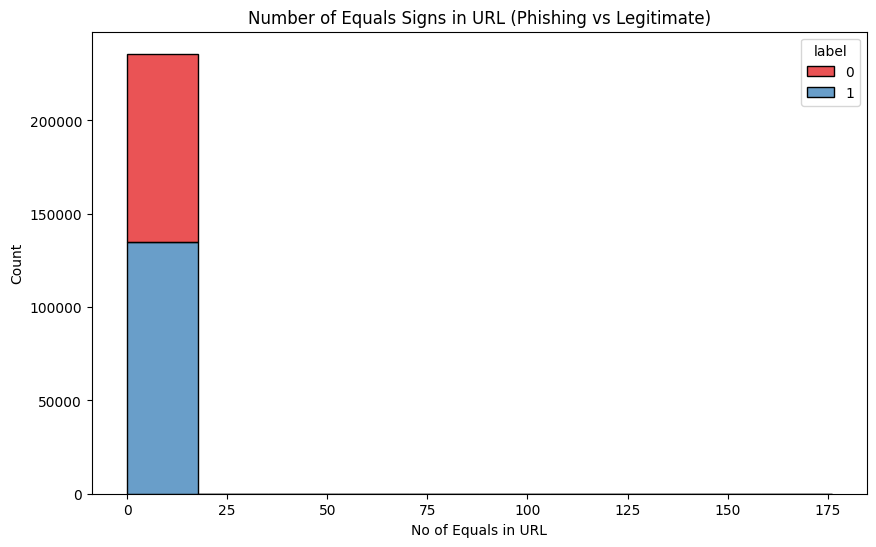

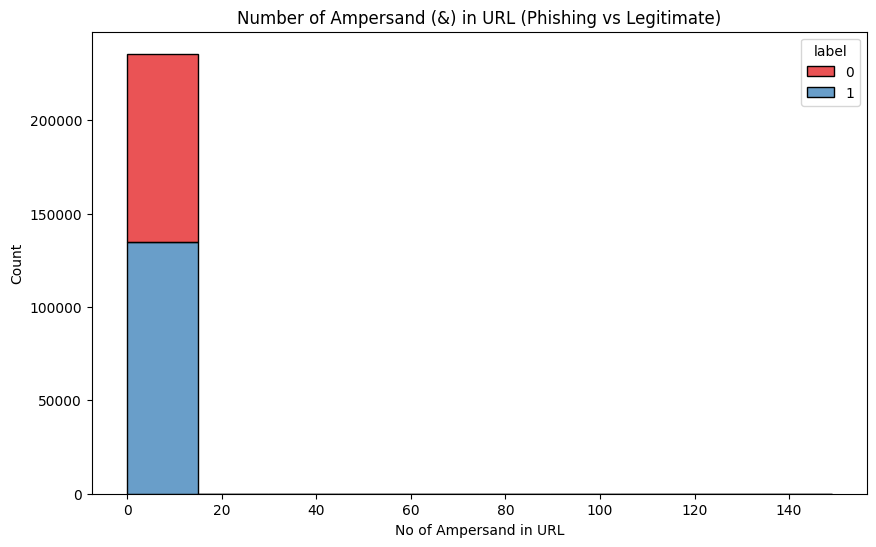

In [12]:
# 10. Distribution of special characters in URL (NoOfEqualsInURL, NoOfAmpersandInURL)
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfEqualsInURL', hue='label', multiple='stack', bins=10, palette='Set1')
plt.title('Number of Equals Signs in URL (Phishing vs Legitimate)')
plt.xlabel('No of Equals in URL')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfAmpersandInURL', hue='label', multiple='stack', bins=10, palette='Set1')
plt.title('Number of Ampersand (&) in URL (Phishing vs Legitimate)')
plt.xlabel('No of Ampersand in URL')
plt.ylabel('Count')
plt.show()

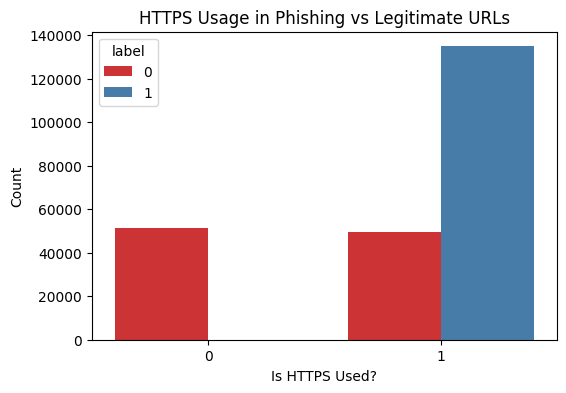

In [13]:
# 11. Analysis of HTTPS usage (IsHTTPS) in Phishing vs Legitimate URLs
plt.figure(figsize=(6,4))
sns.countplot(x='IsHTTPS', hue='label', data=df, palette='Set1')
plt.title('HTTPS Usage in Phishing vs Legitimate URLs')
plt.xlabel('Is HTTPS Used?')
plt.ylabel('Count')
plt.show()

                            URLLength  DomainLength  IsDomainIP  \
URLLength                    1.000000      0.243091    0.277272   
DomainLength                 0.243091      1.000000   -0.041398   
IsDomainIP                   0.277272     -0.041398    1.000000   
URLSimilarityIndex          -0.421104     -0.420694   -0.121439   
CharContinuationRate        -0.241104     -0.577425   -0.101307   
TLDLegitimateProb           -0.016656      0.027209   -0.053220   
URLCharProb                 -0.245215     -0.178104   -0.111769   
TLDLength                    0.033339      0.152669   -0.011125   
NoOfSubDomain                0.071058      0.399157    0.084619   
HasObfuscation               0.161980      0.041643    0.001239   
NoOfObfuscatedChar           0.459094      0.011304    0.000354   
ObfuscationRatio             0.127472      0.021627    0.000977   
NoOfLettersInURL             0.956047      0.277602    0.244300   
LetterRatioInURL             0.312632      0.547854   -0.00263

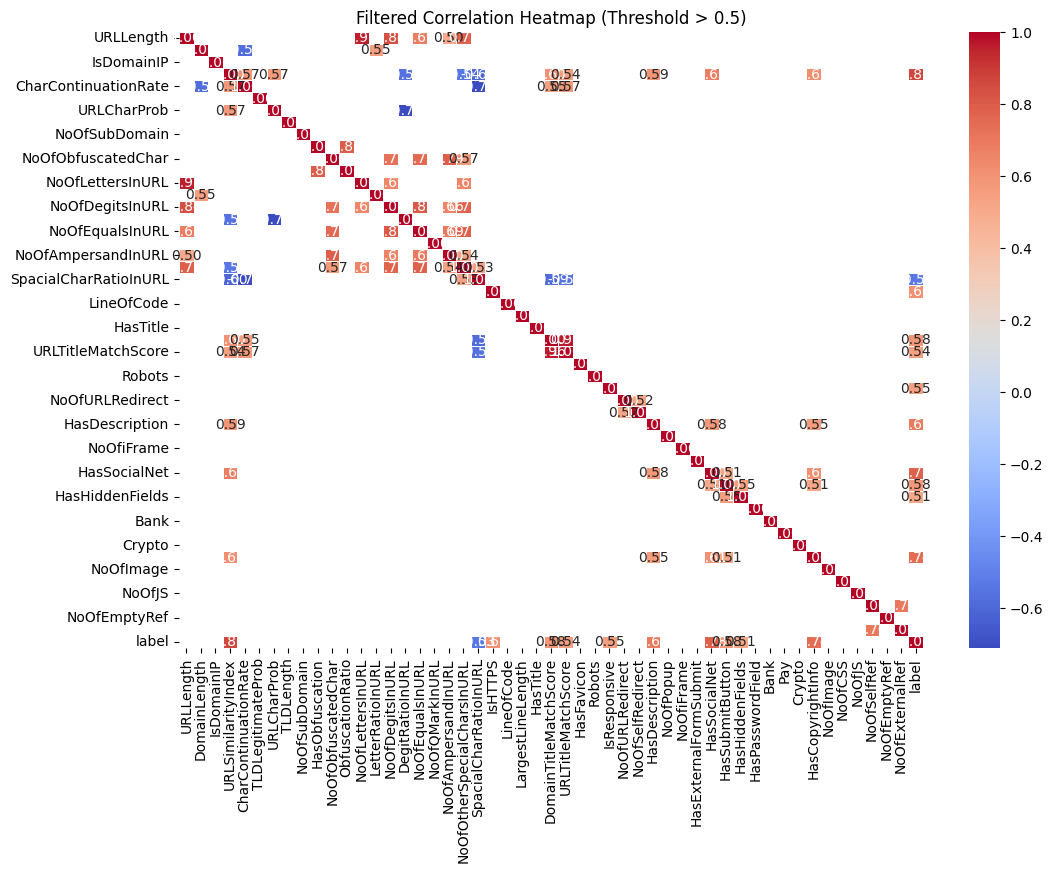

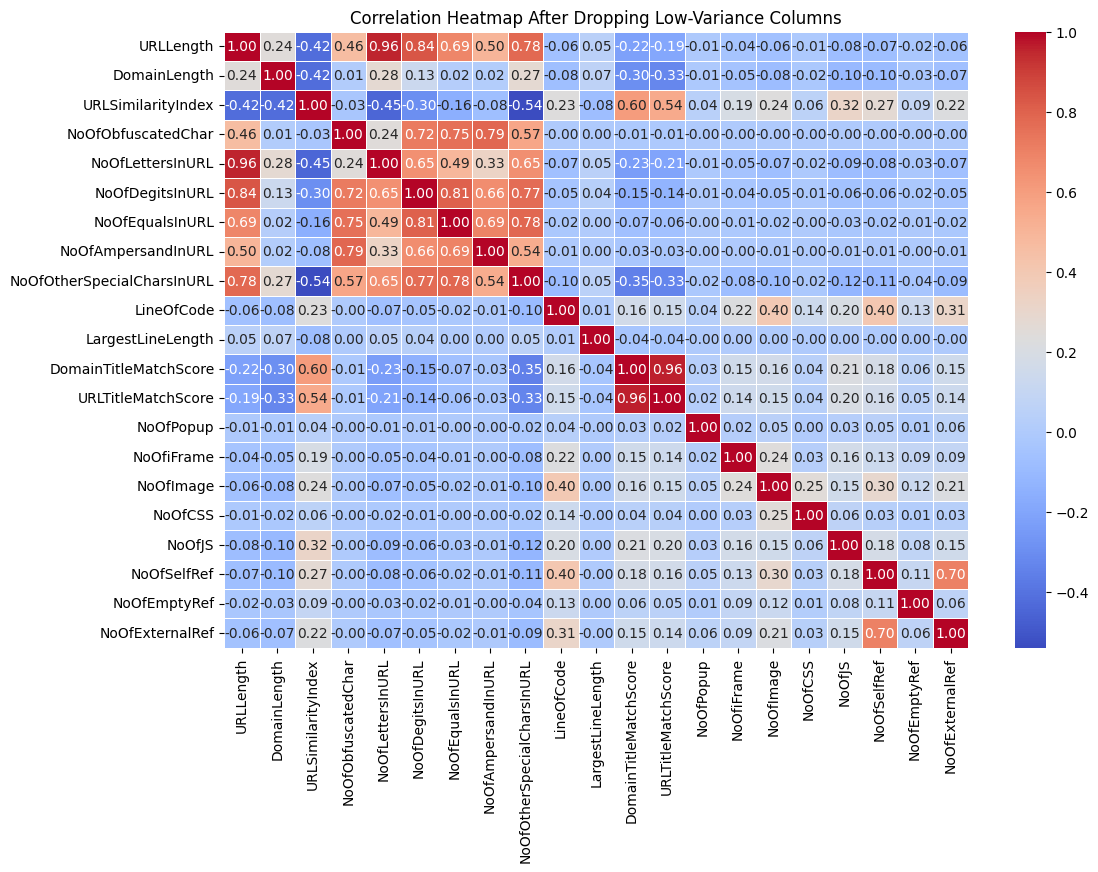

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

# Set a threshold for showing only strong correlations
threshold = 0.5

# Filter the correlation matrix
filtered_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Plot the filtered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Filtered Correlation Heatmap (Threshold > 0.5)')
plt.show()

# Drop columns with low variance
low_variance_cols = numeric_df.columns[numeric_df.var() <= 0.5]
numeric_df_filtered = numeric_df.drop(columns=low_variance_cols)

# Recalculate correlation matrix
corr_matrix_filtered = numeric_df_filtered.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap After Dropping Low-Variance Columns')
plt.show()


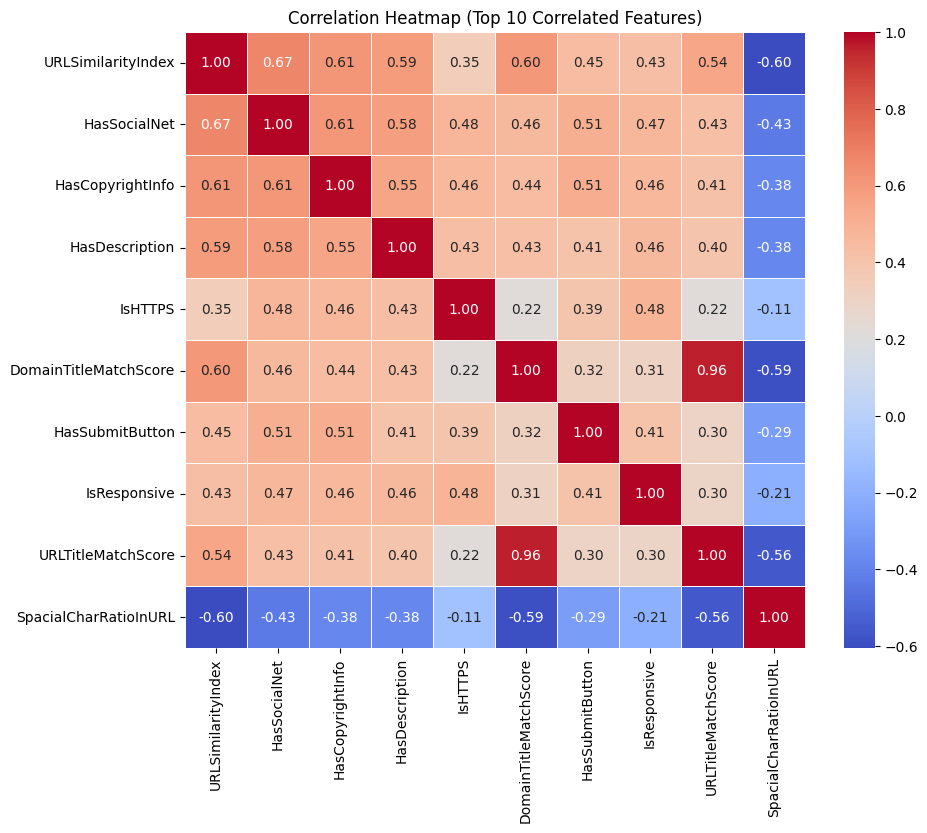

In [15]:
# Get the correlation with the target variable 'label'
correlation_with_label = corr_matrix['label'].abs().sort_values(ascending=False)

# Select the top N most correlated features (excluding label itself)
top_features = correlation_with_label.index[1:11]  # Select top 10 correlated features

# Filter the correlation matrix for these top features
filtered_corr = corr_matrix.loc[top_features, top_features]

# Plot the heatmap for top features
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Top 10 Correlated Features)')
plt.show()


C:\Users\Abhirup Das\AppData\Local\Temp\ipykernel_42548\3364057915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_label.index[1:11], y=correlation_with_label.values[1:11], palette='viridis')


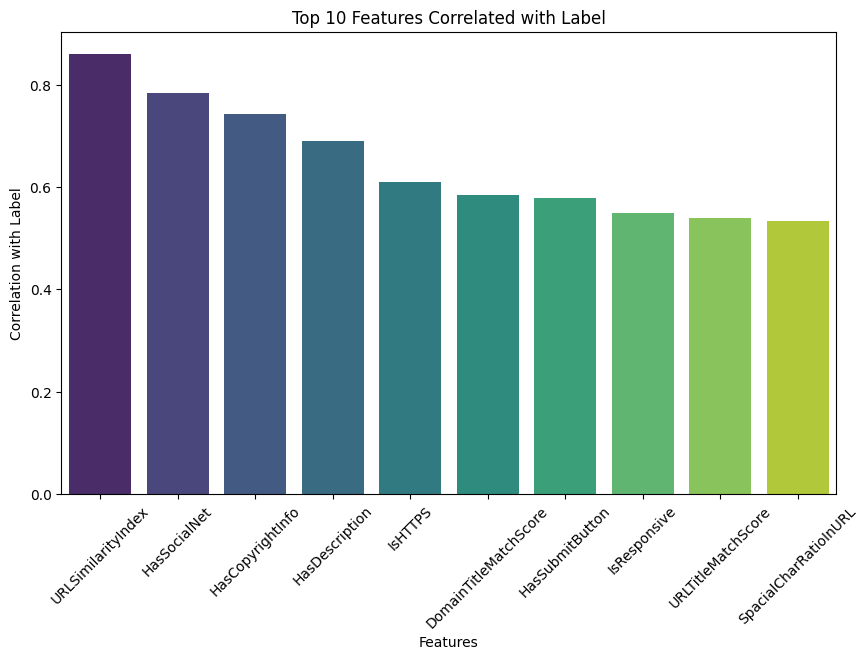

In [16]:
# Plot the top 10 features with their correlation to 'label' in a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_label.index[1:11], y=correlation_with_label.values[1:11], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Correlation with Label')
plt.title('Top 10 Features Correlated with Label')
plt.show()

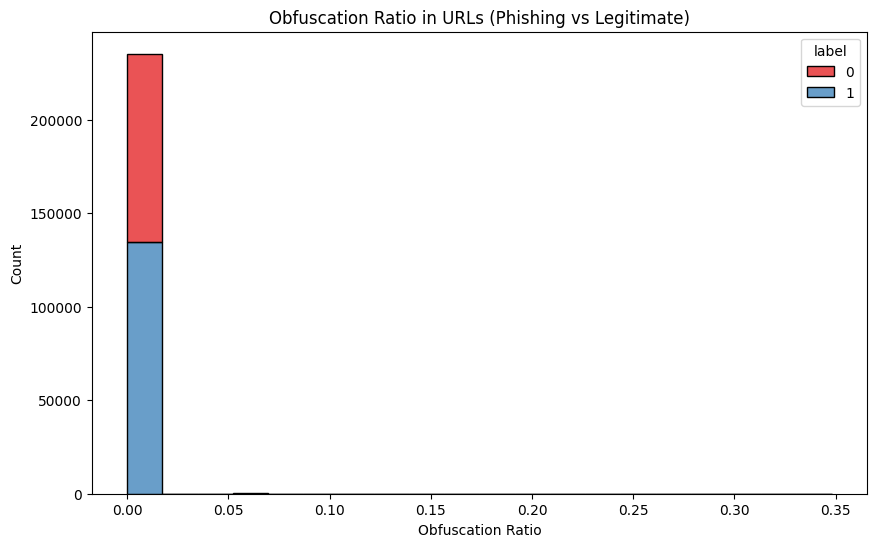

In [17]:

# 13. Analyzing features related to Obfuscation
plt.figure(figsize=(10,6))
sns.histplot(df, x='ObfuscationRatio', hue='label', multiple='stack', bins=20, palette='Set1')
plt.title('Obfuscation Ratio in URLs (Phishing vs Legitimate)')
plt.xlabel('Obfuscation Ratio')
plt.ylabel('Count')
plt.show()

C:\Users\Abhirup Das\AppData\Local\Temp\ipykernel_42548\1563772232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='ObfuscationRatio', data=df, palette='Set2')


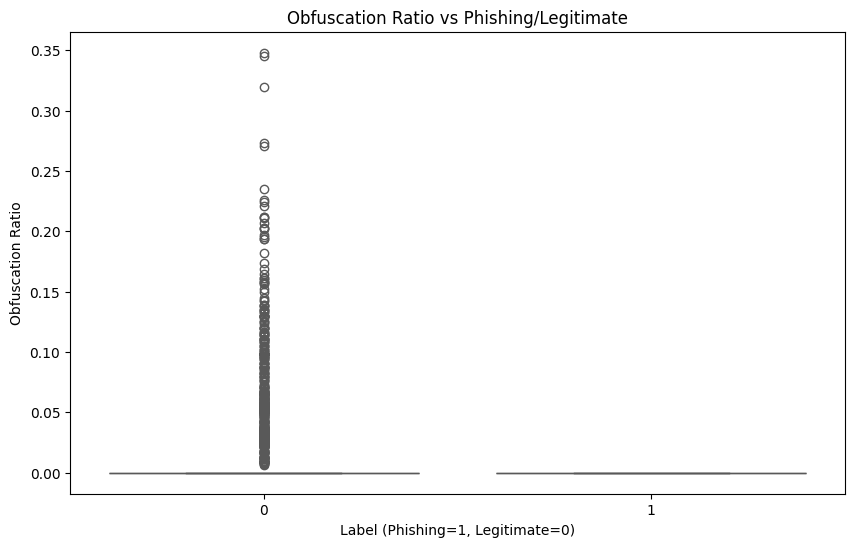

In [18]:
# 14. Boxplot for ObfuscationRatio vs Label
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='ObfuscationRatio', data=df, palette='Set2')
plt.title('Obfuscation Ratio vs Phishing/Legitimate')
plt.xlabel('Label (Phishing=1, Legitimate=0)')
plt.ylabel('Obfuscation Ratio')
plt.show()


C:\Users\Abhirup Das\AppData\Local\Temp\ipykernel_42548\2554020168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tld_counts.index, y=tld_counts.values, palette='Set2')


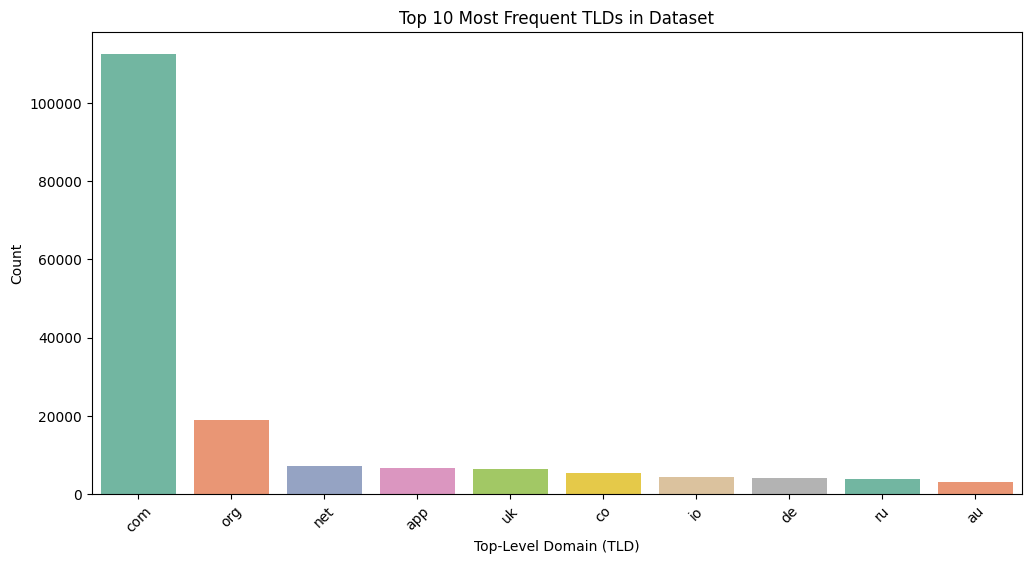

In [19]:
# 15. Analysis of Top-Level Domain (TLD) and phishing risk
plt.figure(figsize=(12,6))
tld_counts = df['TLD'].value_counts().nlargest(10)
sns.barplot(x=tld_counts.index, y=tld_counts.values, palette='Set2')
plt.title('Top 10 Most Frequent TLDs in Dataset')
plt.xlabel('Top-Level Domain (TLD)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

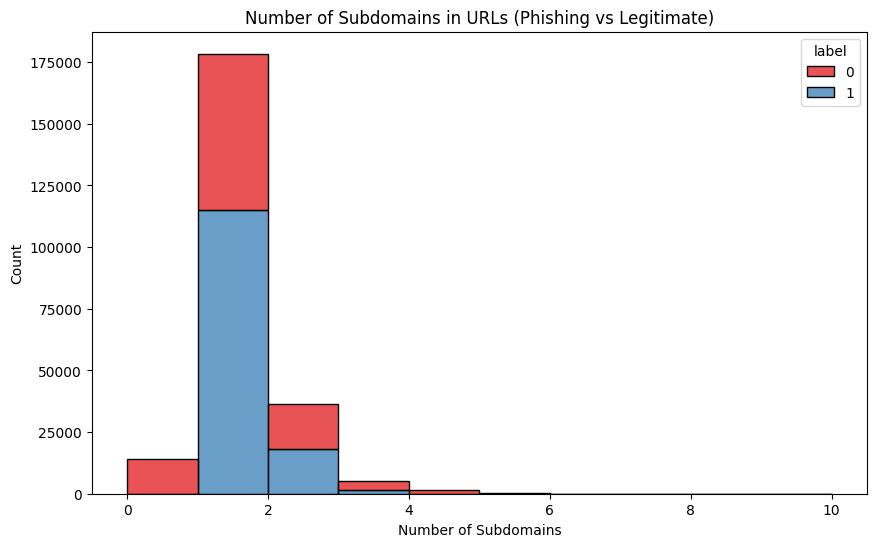

In [20]:
# 16. Distribution of Number of Subdomains
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfSubDomain', hue='label', multiple='stack', bins=10, palette='Set1')
plt.title('Number of Subdomains in URLs (Phishing vs Legitimate)')
plt.xlabel('Number of Subdomains')
plt.ylabel('Count')
plt.show()

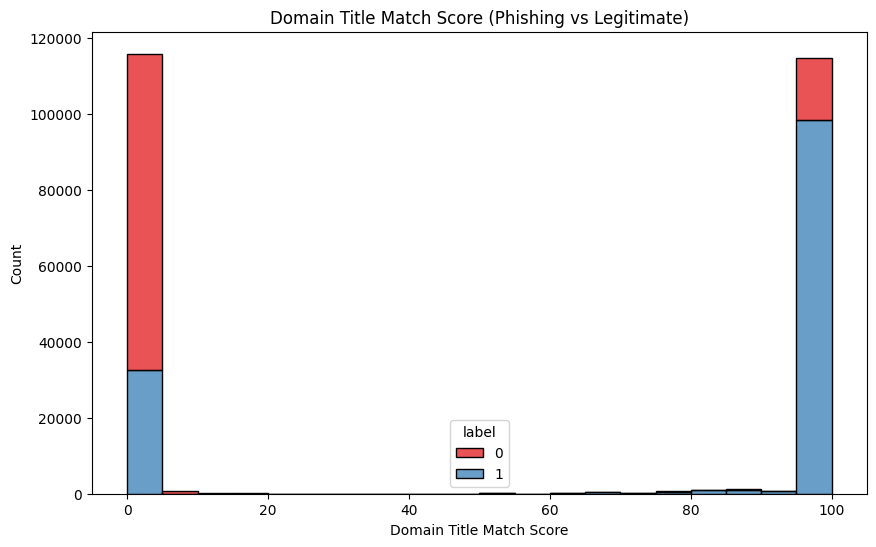

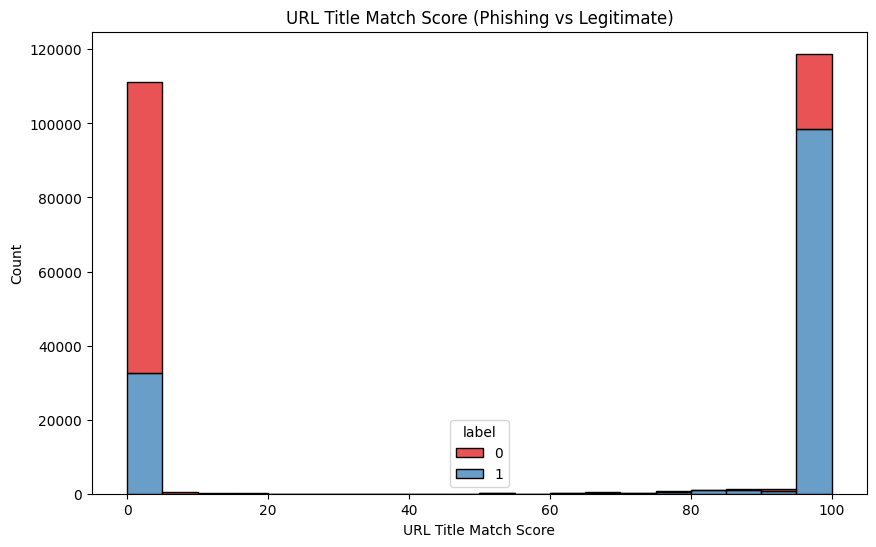

In [21]:
# 17. Relationship between Title Match Score and Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='DomainTitleMatchScore', hue='label', multiple='stack', bins=20, palette='Set1')
plt.title('Domain Title Match Score (Phishing vs Legitimate)')
plt.xlabel('Domain Title Match Score')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df, x='URLTitleMatchScore', hue='label', multiple='stack', bins=20, palette='Set1')
plt.title('URL Title Match Score (Phishing vs Legitimate)')
plt.xlabel('URL Title Match Score')
plt.ylabel('Count')
plt.show()

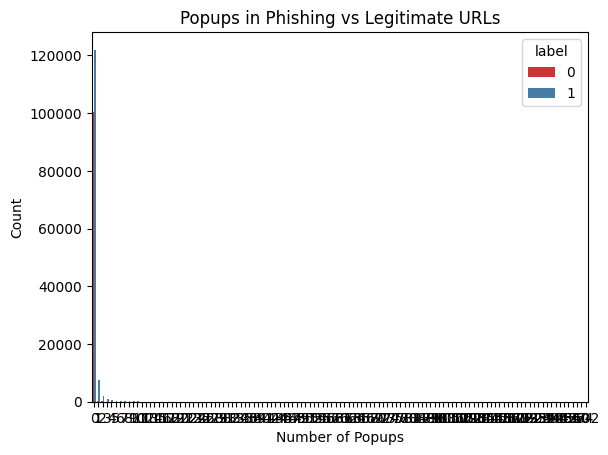

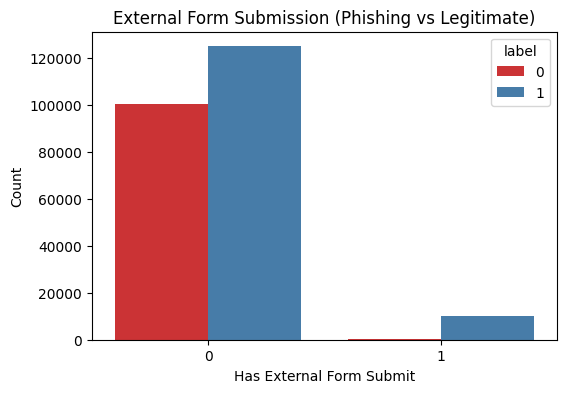

In [22]:
# 18. Analyzing presence of popups and external form submissions (Phishing indicators)
# Countplot for the number of popups in the URLs
sns.countplot(x='NoOfPopup', hue='label', data=df, palette='Set1')
plt.title('Popups in Phishing vs Legitimate URLs')
plt.xlabel('Number of Popups')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='HasExternalFormSubmit', hue='label', data=df, palette='Set1')
plt.title('External Form Submission (Phishing vs Legitimate)')
plt.xlabel('Has External Form Submit')
plt.ylabel('Count')
plt.show()

In [23]:
# Print all column names in the dataset
print(df.columns)


Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

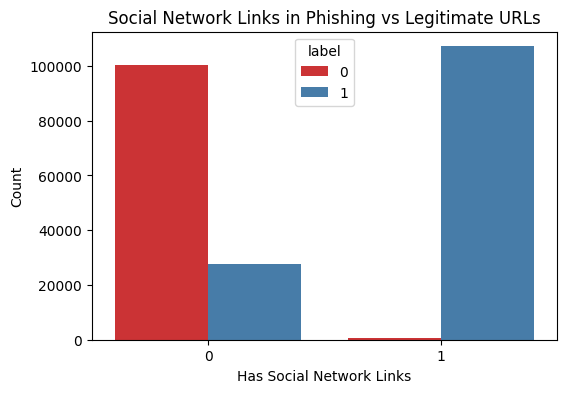

In [24]:
# 19. Analyzing if social network links are present
plt.figure(figsize=(6,4))
sns.countplot(x='HasSocialNet', hue='label', data=df, palette='Set1')
plt.title('Social Network Links in Phishing vs Legitimate URLs')
plt.xlabel('Has Social Network Links')
plt.ylabel('Count')
plt.show()

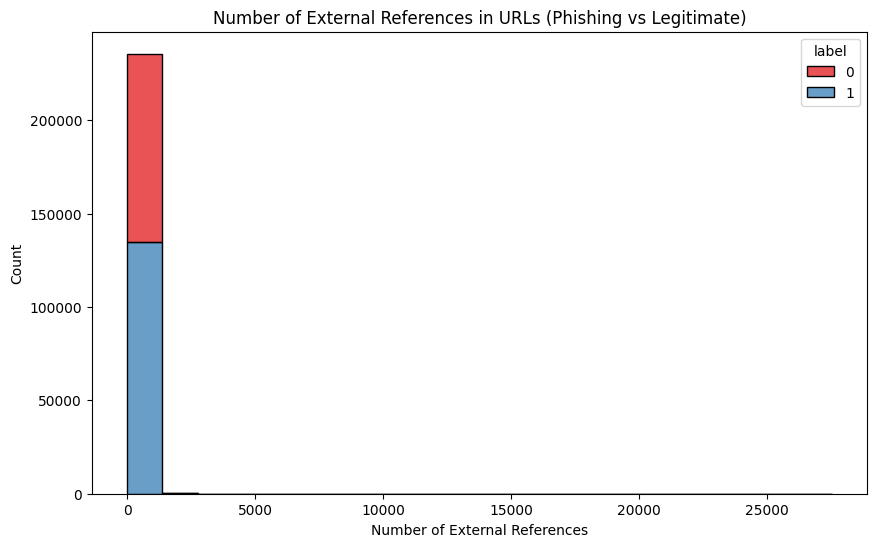

In [25]:
# 20. Analyzing the number of external references (URLs) in the webpage
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfExternalRef', hue='label', multiple='stack', bins=20, palette='Set1')
plt.title('Number of External References in URLs (Phishing vs Legitimate)')
plt.xlabel('Number of External References')
plt.ylabel('Count')
plt.show()